In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,classification_report,confusion_matrix
from sklearn.linear_model import LinearRegression

In [2]:
housing = pd.read_csv(r"C:\Users\aezhi\.jupyter\kc_house_data.csv")

In [3]:
housing.shape

(21613, 21)

In [8]:
housing.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
housing.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
housing.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer

#print(housing['date'])
label = LabelEncoder()
housing['date']=label.fit_transform(housing['date'])

onehot = OneHotEncoder(categories= [1])
housing = onehot.fit_transform(housing).toarray()

In [52]:
# multiLinear Regression
x = housing.iloc[:,np.r_[2:21]].values
y = housing['price'].values

In [53]:
x.shape

(21613, 19)

In [23]:
y.shape

(21613,)

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [62]:
housing.shape

(21613, 21)

In [63]:
x_train.shape

(15129, 19)

In [56]:
x_test.shape

(6484, 19)

<AxesSubplot:>

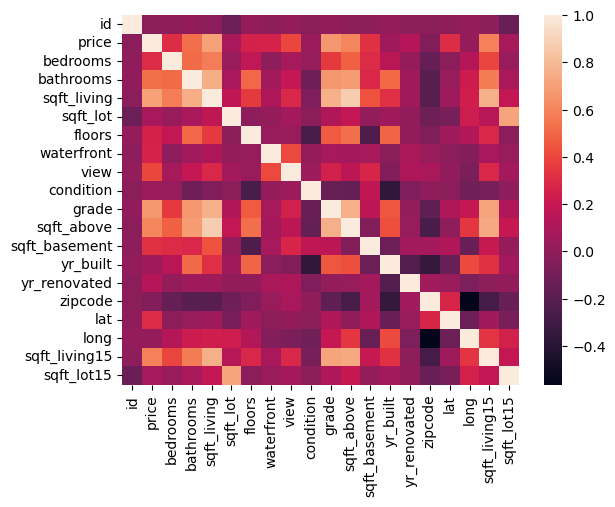

In [70]:
import seaborn as sns
sns.heatmap(housing.corr())#,annot=True)

In [64]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [65]:
print('Coeff: ',model.coef_)
print('Intercept: ',model.intercept_)

Coeff:  [ 1.00000000e+00 -6.88544944e-12 -1.64015152e-11  1.98267297e-15
  4.59386729e-17  8.04896564e-13  2.52498622e-11  3.00475452e-12
 -8.74522939e-13 -1.64092589e-13  1.31601676e-15  6.69686244e-16
  4.66502077e-14  1.92371144e-16  6.30751078e-15  3.78005679e-12
 -4.66892328e-12  2.23677557e-16  1.15698124e-18]
Intercept:  -1.3969838619232178e-09


In [67]:
y_pred = model.predict(x_test)
score = r2_score(y_test,y_pred)
print("Model R2 score : ",score)

Model R2 score :  1.0


# R2 score = 1 , So the model is Best Model

In [71]:
# Model for Testting Data
model_test = LinearRegression()
model_test.fit(x_test,y_test)

LinearRegression()

In [72]:
print("Coeff: ",model_test.coef_)
print("Intercept: ",model_test.intercept_)

Coeff:  [ 1.00000000e+00  1.75675440e-12  5.76709413e-12  1.12046906e-15
 -1.28941432e-16 -2.87109799e-12  3.75453821e-10 -9.36024245e-12
 -5.81880175e-13 -5.47893806e-13  4.54589644e-15 -3.42262338e-15
 -6.66577502e-14 -2.95473140e-15  5.60641635e-15 -1.59293298e-11
  2.13621730e-12 -6.62132154e-16  2.75460311e-17]
Intercept:  1.1641532182693481e-10


In [73]:
y_pred1 = model_test.predict(x_train)
score1 = r2_score(y_train,y_pred1)
print("Model R2 score: ",score1)

Model R2 score:  1.0
